# Neural Networks

## Imports

In [1]:
#
# Use python@3.12
# source ~/pyvenv@3.12/bin/activate
#
! pip install keras tensorflow pillow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

# Setting random seeds to get reproducible results
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(1)

## MNIST dataset

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("Size of the training set", len(x_train))
print("Size of the testing  set", len(x_test))

Size of the training set 60000
Size of the testing  set 10000


The label is 2


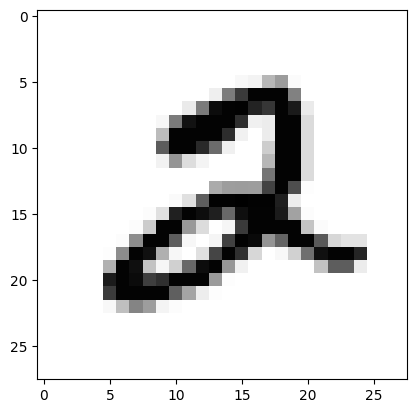

In [4]:
plt.imshow(x_train[5], cmap='Greys')
print("The label is", y_train[5])

## Pre-processing the data

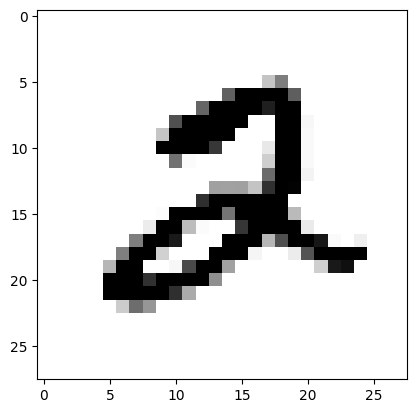

In [5]:
# Sharpen one image
from PIL import Image, ImageFilter
sharpened = Image.fromarray(x_train[5]).filter(ImageFilter.SHARPEN)
plt.imshow(sharpened, cmap='Greys')

In [6]:
# Sharpen all images
from PIL import Image, ImageFilter
x_train_sharpened = []
x_test_sharpened = []

# Train images
for img in x_train:
    x_train_sharpened.append(Image.fromarray(img).filter(ImageFilter.SHARPEN))

# Test images
for img in x_test:
    x_test_sharpened.append(Image.fromarray(img).filter(ImageFilter.SHARPEN))

x_train_sharpened = np.array(x_train_sharpened)
x_test_sharpened = np.array(x_test_sharpened)

In [7]:
# Reshaping the features.
# In the reshape function we use the -1 as a placeholder for the size of the dataset.

x_train_reshaped = x_train_sharpened.reshape(-1, 28*28)
x_test_reshaped  = x_test_sharpened.reshape(-1, 28*28)

In [8]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

## Building and training the neural network

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28*28,)))
model.add(Dropout(.15))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.15))
model.add(Dense(512, activation='relu'))
model.add(Dropout(.15))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.15))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.15))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.15))
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/Users/taareda4/pyvenv@3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 530,570 (2.02 MB)

 Trainable params: 530,570 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.fit(x_train_reshaped, y_train_cat, epochs=100, batch_size=100)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5835 - loss: 2.6185
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9040 - loss: 0.3446
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9334 - loss: 0.2498
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9441 - loss: 0.2073
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9509 - loss: 0.1823
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9580 - loss: 0.1575
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9602 - loss: 0.1505
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9624 - loss: 0.1424
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9647 - loss: 0.1322
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9676 - loss: 0.1216
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9711 - loss: 0.1117
Epoch 12/100
600/600 ━━━━━━━━━━━━━━━━━━━━

## Making predictions

In [11]:
predictions_vector = model.predict(x_test_reshaped)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step


In [12]:
predictions = [np.argmax(pred) for pred in predictions_vector]

The label is 4
The prediction is 4


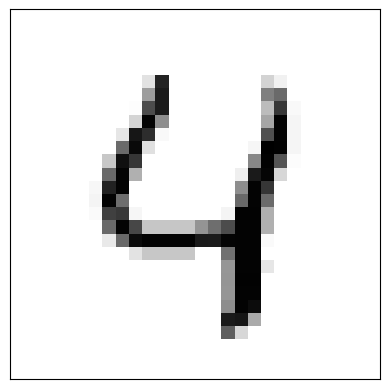

In [13]:
plt.imshow(x_test[4], cmap='Greys')
plt.xticks([])
plt.yticks([])
print("The label is", y_test[4])
print("The prediction is", predictions[4])

## Finding the accuracy of the model on the test set

In [14]:
num_correct = 0
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        num_correct += 1

print("The model is correct", num_correct, "times out of", len(y_test))
print("The accuracy is", num_correct/len(y_test))

The model is correct 9777 times out of 10000
The accuracy is 0.9777
